# Regression over housing details California -    

In [41]:
import numpy as np 
import pandas as pd 

from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler 

%matplotlib inline 
import matplotlib as mlp 
import matplotlib.pyplot as plt 

In [42]:
import tensorflow as tf 
from tensorflow import keras 

In [43]:
np.random.seed(42) 
tf.random.set_seed(42) 

Loading housing dataset -  

In [44]:
from sklearn.datasets import fetch_california_housing 
housing = fetch_california_housing() 

In [45]:
housing.feature_names 

['MedInc',
 'HouseAge',
 'AveRooms',
 'AveBedrms',
 'Population',
 'AveOccup',
 'Latitude',
 'Longitude']

In [46]:
x_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target, random_state=42) 
X_train, X_valid, y_train, y_valid = train_test_split(x_train_full, y_train_full, random_state=42)   

print(f"Train_full size :\n{x_train_full.shape}\n{y_train_full.shape}\nTest size : \n{X_test.shape}\n{y_test.shape}") 
print(f"\nTrain size :\n{X_train.shape}\n{y_train.shape}\nValid^n size : \n{X_valid.shape}\n{y_valid.shape}") 

Train_full size :
(15480, 8)
(15480,)
Test size : 
(5160, 8)
(5160,)

Train size :
(11610, 8)
(11610,)
Valid^n size : 
(3870, 8)
(3870,)


In [47]:
scaler = StandardScaler() 
X_train = scaler.fit_transform(X_train) 
X_valid = scaler.transform(X_valid) 
X_test = scaler.transform(X_test) 

# Keras neural network model -  

In [48]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation='relu', input_shape=X_train.shape[1:]), 
    keras.layers.Dense(30, activation='relu'),
    keras.layers.Dense(1)
])

model.summary() 

d:\Machine_Learning_PY\virtl_env\Lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_12 (Dense)                │ (None, 30)             │           270 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 30)             │           930 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 1)              │            31 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,231 (4.81 KB)

 Trainable params: 1,231 (4.81 KB)

 Non-trainable params: 0 (0.00 B)

Model comparision and showcase -  

In [49]:
model.compile(loss='mean_squared_error',
              optimizer=keras.optimizers.SGD(learning_rate=1e-3),
              metrics=['mae']) 


In [50]:
model_history = model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid)) 
print(f"Model parameters : {model_history.params}") 
print(f"Model history : \n{model_history.history}") 

Epoch 1/20


363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 3.4946 - mae: 1.4545 - val_loss: 0.9268 - val_mae: 0.7250
Epoch 2/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8763 - mae: 0.7100 - val_loss: 0.7483 - val_mae: 0.6151
Epoch 3/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.7195 - mae: 0.6309 - val_loss: 0.6426 - val_mae: 0.5718
Epoch 4/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.6574 - mae: 0.5954 - val_loss: 0.5764 - val_mae: 0.5448
Epoch 5/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.6137 - mae: 0.5720 - val_loss: 0.5445 - val_mae: 0.5265
Epoch 6/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5795 - mae: 0.5544 - val_loss: 0.5010 - val_mae: 0.5108
Epoch 7/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5521 - mae: 0.5405 - val_loss: 0.4793 - val_mae: 0.4990
Epoch 8/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5296 - mae: 0.5288 - val_loss: 0.4604 - val_mae: 0.4893
Epoch 9/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5109 

# Model Performance -  

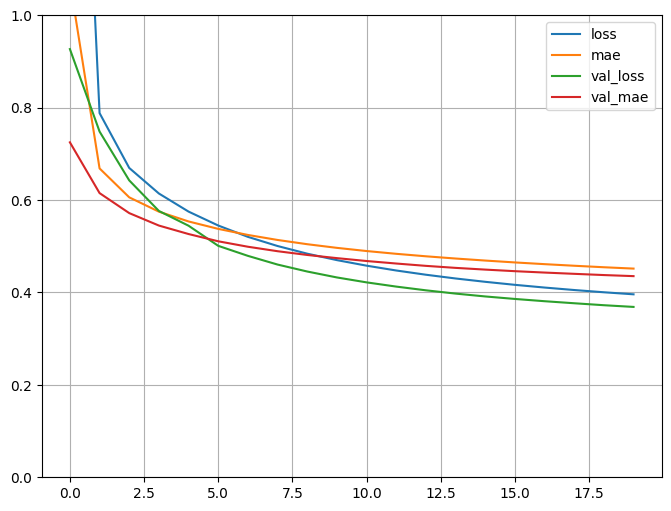

In [51]:
pd.DataFrame(model_history.history).plot(figsize=(8,6))  
plt.grid(True) 
plt.gca().set_ylim(0,1) 
plt.show() 

In [52]:
mae_test = model.evaluate(X_test, y_test) 

162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 795us/step - loss: 0.3907 - mae: 0.4482


In [53]:
X_new = X_test[:3] 
X_new 

array([[-1.15780104, -0.28673138, -0.49550877, -0.16618097, -0.02946012,
         0.38899735,  0.19374821,  0.2870474 ],
       [-0.7125531 ,  0.10880952, -0.16332973,  0.20164652,  0.12842117,
        -0.11818174, -0.23725261,  0.06215231],
       [-0.2156101 ,  1.8491895 , -0.57982788,  0.18528489, -0.10429403,
        -0.67694905,  1.00890193, -1.4271529 ]])

In [54]:
y_pred = model.predict(X_new) 
print(f"Prediction value = {y_pred}") 
print(f"Test value = {y_test[:3]}") 

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
Prediction value = [[0.6421824]
 [1.5757473]
 [3.8841252]]
Test value = [0.477   0.458   5.00001]
